In [51]:
import colorsys as cs
import os
import numpy as np
from PIL import Image,ImageEnhance
from skimage import data
from scipy import misc
from matplotlib import pyplot as plt
from matplotlib import image as img

In [62]:
def hls_to_rgb(r, g, b):
  return[ color * 255 for color in list(cs.hls_to_rgb(r,g,b))]
 

def adjust_hls(image, hue=1, light=1, saturation=1):
  hls_image = [[list(cs.rgb_to_hls(*rgb/255)) for rgb in row] for row in image]
  hls_adjusted_image = [[[hls[0]*hue,hls[1]*light,hls[2]*saturation] for hls in row] for row in hls_image]
  back_to_rgb = [[ np.asarray(hls_to_rgb(*rgb)).astype(int) for rgb in row] for row in hls_adjusted_image]
  return back_to_rgb

import numpy as np

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    source = np.asarray(source)
    template = np.asarray(template)

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    #After fitting values to curve the RGB Values may not be whole numbers and 
    #Need to be rounded otherwise they wont make any sense 
    matched_unrounded = interp_t_values[bin_idx].reshape(oldshape) 
    matched = [[ [int(rgb[0]), int(rgb[1]), int(rgb[2])] for rgb in row] for row in matched_unrounded]
    return matched

def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

def load_images(folder):
    imgs = []
    image_types = [".jpg",".gif",".png",".tga",'.jpeg']
    for f in os.listdir(folder):
        print(f)
        ext = os.path.splitext(f)[1]
        if ext.lower() in image_types:
            imgs.append(Image.open(os.path.join(folder,f)))
    return imgs


def match_mult_images(sources,template):
    '''
    1. Load images
    2. match them
    3. create side by side plot.
    4. append to larger figure 
    '''
    matched_images =[hist_match(image, template) for image in sources]
    row = len(sources)
    fig, ax = plt.subplots(row, 2, sharex='col', sharey='row')
    for i in range(row):
            ax[i, 0].imshow(sources[i], cmap=plt.cm.gray)
            ax[i, 0].set_title(f'Source {i+1}')
            ax[i, 0].axis('off')
            ax[i,1].imshow(matched_images[i], cmap=plt.cm.gray)
            ax[i, 1].set_title('Matched')
            ax[i, 1].axis('off')
           
    plt.show()


cat_temp.jpg
cat_test.jpeg
cat_test2.jpg


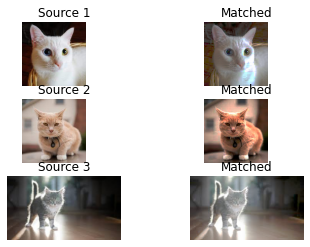

In [63]:
pics = load_images('sources')
temp = Image.open('download.jpg')
match_mult_images(pics, temp)

cat_test.jpeg
cat_test2.jpg


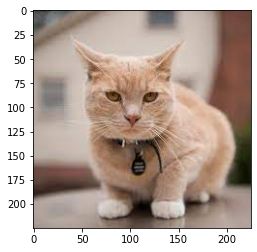

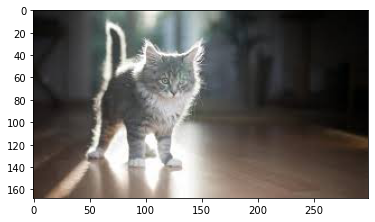

In [54]:
images = load_images('sources')
for image in images:
    plt.imshow(image)
    plt.show()
